## Gradient Descent
我們將使用廣告數據集。這是一個數據集，它為我們提供了不同產品在電視、廣播和報紙上進行營銷後的總銷售額。使用我們的算法，我們可以找出哪種媒介對我們的銷售表現最好，並相應地為所有媒介分配權重。這個數據集可以從下面給出的鏈接下載：
- Resource: https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f
- data：https://www.kaggle.com/datasets/sazid28/advertising.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


X 代表電視、廣播和報紙，而 Y 代表我們的銷售額。由於所有這些銷售的規模可能不同，因此我們將 X 和 Y 變量正規化。

In [3]:
X = df[['TV','radio','newspaper']]
Y = df['sales']
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

一旦我們有了標準化的數據集，我們就可以開始定義我們的算法了。要實現梯度下降(gradient descent)算法，我們需要遵循 4 個步驟：

1. 隨機初始化偏置和權重theta
2. 在給定偏差和權重的情況下計算 y 的預測值 Y
3. 根據 Y 的預測值和實際值計算成本函數
4. 計算梯度和權重

首先，我們將為偏差和權重取一個隨機值，它實際上可能接近最佳偏差和權重，也可能相距甚遠。

在這裡，我們創建了一個名為 initialise 的函數，它為我們提供了一些偏差和權重的隨機值。我們使用隨機庫為我們提供適合我們需要的隨機數。下一步是使用這些權重和偏差計算輸出 (Y)。

In [8]:
import random
def initialize(dim):
    bias = random.random()
    theta = np.random.rand(dim)
    return bias,theta

bias,theta = initialize(3)
print('Bias:',bias)
print('Weights:',theta)

Bias: 0.23131053381873845
Weights: [0.98457501 0.2784364  0.72505594]


Y_hat 是預測輸出值，而 Y 將是實際值。這些之間的差異將為我們提供成本函數。這將在我們的下一個函數中計算。

In [10]:
def predict_Y(bias,theta,X):
    return bias + np.dot(X,theta)

Y_hat = predict_Y(bias,theta,X)
Y_hat[0:10]

array([ 2.74302647, -0.15963994,  0.45672894,  1.55105635,  1.31174341,
        0.60527789, -0.85156614, -0.77625171, -2.73716918,  0.13738668])

這是我們的成本函數，我們的目標是盡可能減少它以獲得最準確的預測。

In [11]:
import math
def get_cost(Y,Y_hat):
    Y_resd= Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

Y_hat=predict_Y(bias,theta,X)
get_cost(Y,Y_hat)

0.6845987257969225

為了獲得更新的偏差和權重，我們使用梯度下降公式，傳遞給函數的參數是：
- x,y : 輸入和輸出變量
- y_hat：具有當前偏差和權重的預測值
- b_0,theta_0：當前偏差和權重
- learning rate：學習率調整

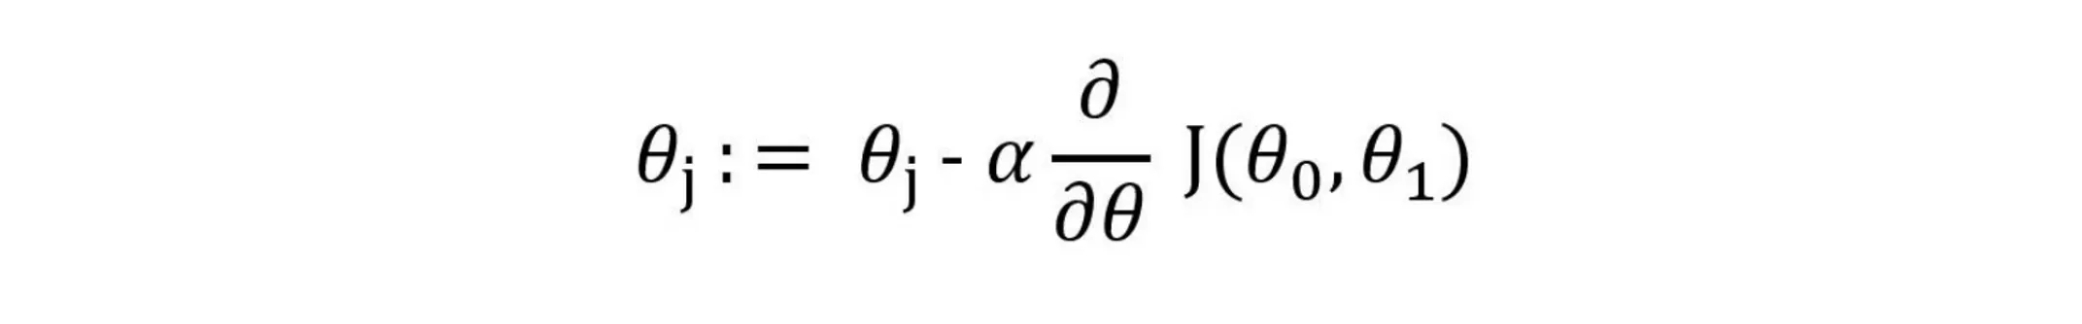

In [18]:
def update_theta(x, y, y_hat, b_0, theta_o, learning_rate):
    '''
    梯度下降公式(更新的偏差和權重)
    函數接受特徵向量 x、觀察值向量 y、預測值向量 y_hat、
    偏差 b_0、權重向量 theta_o、學習率 learning_rate。
    '''
    db = (np.sum(y_hat-y)*2) / len(y)        # 計算誤差的梯度，即 db 和 dw。其中 db 是偏差的梯度，dw 是權重的梯度。
    dw = (np.dot((y_hat-y),x)*2) / len(y)
    b_1     = b_0 - learning_rate * db       # 使用梯度和學習率更新偏差 b_0 和權重 theta_o。
    theta_1 = theta_o - learning_rate*dw
    return b_1,theta_1                       # 更新後的偏差和權重

print("After initialization -Bias: ",bias)
print("After initialization -theta: ",theta)
Y_hat = predict_Y(bias,theta,X)               #使用 predict_Y 函數計算預測值 Y_hat。
bias, theta = update_theta(X,Y,Y_hat,bias,theta,0.01)   #執行梯度下降公式 預設 0.01 學習率

print("After first update -Bias: ", bias)
print("After first update -theta: ", theta)
get_cost(Y,Y_hat)     #成本函數

After initialization -Bias:  0.2090864020376674
After initialization -theta:  [0.95998209 0.27813138 0.66286297]
After first update -Bias:  0.20490467399691403
After first update -theta:  [0.95539412 0.27834537 0.65117307]


0.5861945595732121

正如我們所看到的，成本函數隨著新的偏差和權重而減少。目前我們把學習率取為0.001，我們也會用0.01試試，看看能不能有更好更優的學習率。現在我們已經創建了所有必需的函數，我們可以創建一個主要的梯度下降函數，它運行它們進行特定次數的迭代並找到最佳偏差和權重。對於此實現，我們將函數運行 200 次迭代。

In [48]:
def run_gradient_descent(X, Y, alpha,num_iterations):
    bias,theta = initialize(X.shape[1])  
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) #空集合儲存每次迭代
    result_idx = 0
    
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(bias,theta,X)   # Y_hat 是預測輸出值
        this_cost = get_cost(Y,Y_hat)     # 成本函數
        prev_b = bias
        prev_theta = theta 
        bias,theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha) #梯度下降公式(更新的偏差和權重)
        
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx] = [iter_num,this_cost]
            result_idx = result_idx+1
            
        iter_num += 1
        #print(f'Final Estimate of bias:{bias:.2f} &theta:{theta}')
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001, num_iterations=200)
gd_iterations_df[0:10]

,iteration,cost
0,0.0,0.569965
1,10.0,0.554785
2,20.0,0.540128
3,30.0,0.525973
4,40.0,0.512304
5,50.0,0.499101
6,60.0,0.486349
7,70.0,0.474032
8,80.0,0.462132
9,90.0,0.450637


theta 以 3 個數字的列表形式出現，因為我們有 3 個輸入，電視、廣播和報紙。如果我們打印每次迭代的成本函數，我們可以看到成本函數的減少。我們還可以將成本函數繪製到迭代中以查看結果。圖片上 MSE 的迭代狀況，正如我們所看到的，成本函數隨著迭代次數的增加而減少。

Text(0, 0.5, 'Cost or MSE')

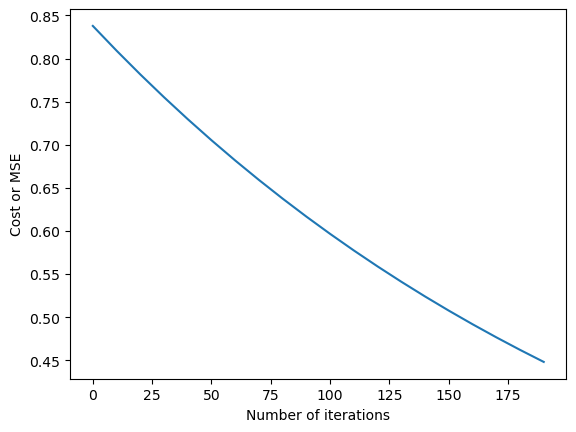

In [44]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

我們仍然沒有達到收斂。現在，讓我們嘗試使用 α=0.01 進行 2000 次迭代，並將其與 α=0.001 進行比較，找出對於該數據集哪個學習率更好。

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

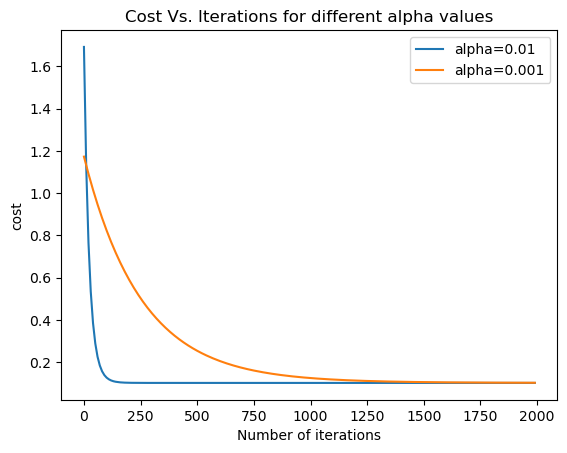

In [49]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()

plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

可以看出，0.01 是更優的學習率，因為它比 0.001 收斂得更快。0.01 在 100 標記附近收斂，而 0.001 需要 1000 次迭代才能達到收斂。
因此，我們成功地在python上構建了梯度下降算法。請記住，學習率的最佳值對於每個數據集都是不同的。